In [1]:
#Start 5 min q&A
#1 min freestyle

#dimensionaltiy reduction reasons
# 1. Space efficiency - makes data small
# 2. Computing efficiency It fastens the time required for performing same computations. 
# Less dimensions leads to less computing, 
# also less dimensions can allow usage of algorithms unfit for a large number of dimensions like linear regression
# 3. Visualizations!

#We'll compare 2 - PCA and T-SNE most popular.
#feature selection: you select a subset of the original feature set; while (NO NEED)
#feature extraction: you build a new set of features from the original feature set.

# Exploration of Principle Component Analysis
#PCA finds the principal components of data.

#It is often useful to measure data in terms of its principal components 
#rather than on a normal x-y axis. So what are principal components then? 
#They’re the underlying structure in the data. They are the directions where there is 
#the most variance, the directions where the data is most spread out. This is 
#easiest to explain by way of example. Here’s some triangles in the shape of an oval:
#https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/

In [2]:
import numpy as np
np.random.seed(1) # random seed for consistency, debugging same results every time

In [3]:
#We'll first create 2 classes

#each with 3 features
# create class 1 random sampled 3 X 20 data set 

In [42]:
#Draw random samples from a multivariate normal distribution.
#also called Gaussian distribution
#https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Gaussian_2d.png/786px-Gaussian_2d.png
#uses mean to define center ,covariance for width, or standard deviation. how wide. how spread.
#btw Covariance is a measure of how changes in one variable are associated with changes in a second variable. 
#Specifically, covariance measures the degree to which two variables are linearly associated.
mu_vec1 = np.array([0,0,0])  # sample mean
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # sample covariance
#Transpose of a Matrix. A matrix which is 
#formed by turning all the rows of a given matrix into columns and vice-versa. 
#convenience, for printing
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print class1_sample

[[-0.22876583 -0.74996962 -0.4791571  -0.42914228  0.84086156 -0.04970258
   0.80884436 -1.68405999 -0.33128317  1.00088142 -0.53223402 -0.72239191
  -0.82246719 -0.59384307  1.04499441 -0.10839207  0.8709698  -0.11877117
  -0.4189379  -1.40232915]
 [ 1.61336137  2.0546241   0.35016716  1.20845633 -0.10288722  0.46664327
   1.78975468 -1.1601701   0.38653915 -0.38483225  1.1181334   1.09899633
   0.72171129 -0.34390071  0.6085147   0.45015551 -0.50845713 -0.19899818
  -0.47918492  0.45112294]
 [-0.37480469  0.05340954  0.01716473  1.1157018   1.14690038  1.03368687
   0.45128402  1.35010682 -0.85145566  1.45810824  0.6743961  -0.90163449
  -0.625342   -1.00016919 -0.0693287   1.7653351   0.77741921  1.86647138
  -1.95210529 -0.6949209 ]]


In [5]:
# create class 2 random sampled 3 x 20 data set

In [43]:
mu_vec2 = np.array([1,1,1]) # sample mean
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print class2_sample

[[ 1.5154138   1.67457071  2.19783084  0.08155996  0.5851531   0.17137202
  -0.1077125   1.057121    0.74101715  1.08968641  2.69380911 -0.16400797
   0.1911528   2.10717545  1.12837699  1.71304905  1.63658341  0.19381518
   0.71100266  0.64659002]
 [-0.11487105  2.46089238  2.70459417  0.89465529  1.45194604  1.52887975
   0.98228168  0.20045251  1.1892932   0.3988432   1.19686978  1.69336623
   1.55743945  2.44287693  2.76041518  2.30620607  2.40925339  0.74832579
   0.60818376 -0.78791289]
 [ 0.23269017  1.5924728   2.04008915  1.63019567 -0.57915629 -1.23708651
  -0.71939447  0.7084054   0.43621127  1.55607351  1.16986926  0.24193267
   1.18103874  0.46031844  1.96653925  0.39539703  2.62091229  1.38271517
   1.68400133  1.36184732]]


In [7]:
# plot samples

Populating the interactive namespace from numpy and matplotlib


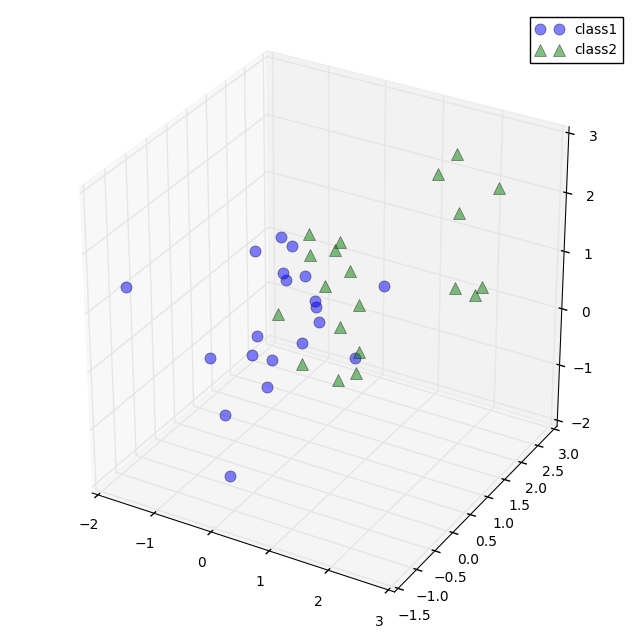

In [46]:
%pylab inline

#plotting
from matplotlib import pyplot as plt

#figure, width and height
fig = plt.figure(figsize=(8,8))
#3d subplot
#These are subplot grid parameters encoded as a single integer, so 1x1 grid 1st subplot
ax = fig.add_subplot(111, projection='3d')
#fontsize
plt.rcParams['legend.fontsize'] = 10

#plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()

In [9]:
# step 1. take the whole data set ignoring classes

In [10]:
#make it one big dataset
#3 x 40 still 3 features
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

In [11]:
all_samples

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208,
         0.24560206,  0.70190716,  2.13162939, -0.39649634,  1.16003707,
        -1.02220122,  1.23009474,  0.79924193,  1.19829972,  1.37756379,
         2.19891788,  0.36126959,  0.65614632,  1.69803203,  1.40349164,
         1.16938243,  0.73378149,  1.31515939,  1.35054598, -0.61577235],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733,
         2.25286816,  1.48851815,  2.51981682, -0.44411381,  1.87616892,
         0.69379599,  1.76201118,  1.18656139,  1.

In [12]:
all_samples.T

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944],
       [-1.09989127, -0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521, -1.10061918],
       [ 1.14472371,  0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786, -0.12289023],
       [-0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 ],
       [-0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218],
       [ 0.74204416, -0.19183555, -0.88762896],
       [-0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514],
       [ 0.12015895,  0.61720311,  0.30017032],
       [-0.35224985, -1.1425182 , -0.34934272],
       [-0.20889423,  0.58662319,  0.83898341],
       [ 0.93110208,  0.28558733,  0.88514116],
       [ 0.24560206,  2.25286816,  1.512

In [13]:
# step 2. compute the d dimensional mean vector, to help compute covariance matrix

In [14]:
#mean for each feature
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

#3D mean vector
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print('Mean Vector:\n', mean_vector)

('Mean Vector:\n', array([[ 0.41667492],
       [ 0.69848315],
       [ 0.49242335]]))


In [15]:
# step 3. compute the covariance matrix

In [18]:
#covariane matrix models relationship between our variables. the variance between each
#http://support.minitab.com/en-us/minitab/17/topic-library/modeling-statistics/anova/anova-statistics/what-is-the-variance-covariance-matrix/
#http://stats.seandolinar.com/making-a-covariance-matrix-in-r/
#Variance is the degree by which a random vairable changes with respect to its expected value
#Covariance is the degree by which two different random variables change with respect to each other. 
#measures relationship between each feature
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

('Covariance Matrix:\n', array([[ 0.9868668 ,  0.26943262,  0.2855759 ],
       [ 0.26943262,  0.92914135,  0.30682016],
       [ 0.2855759 ,  0.30682016,  1.27528118]]))


In [19]:
# note covariance and scatter matricies are idenical except for a scaling factor 1/N

In [20]:
# Step 4. computer eigenvectors and eigenvalues
#Eigenvalues/vectors are instrumental to understanding electrical circuits, mechanical systems, ecology and 
#even Google's PageRank algorithm. 
#Eigenvectors make understanding linear transformations easy.
#They are the "axes" (directions) along which a linear transformation acts simply by 
#"stretching/compressing" and/or "flipping"; 
#eigenvalues give you the factors by which this compression occurs.
#There are a lot of problems that can be modeled with linear transformations, and 
#the eigenvectors give very simply solution
#The more directions you have along which you understand the behavior of a 
#linear transformation, the easier it is to understand the linear transformation; 
#so you want to have as many linearly independent eigenvectors as possible associated 
#to a single linear transformation.
#interactive tool - http://setosa.io/ev/eigenvectors-and-eigenvalues/

In [47]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))

Eigenvector 1: 
[[-0.49210223]
 [-0.47927902]
 [-0.72672348]]
Eigenvalue 1 from scatter matrix: 1.67100943053
Eigenvector 2: 
[[-0.64670286]
 [-0.35756937]
 [ 0.67373552]]
Eigenvalue 2 from scatter matrix: 0.838325973416
Eigenvector 3: 
[[ 0.58276136]
 [-0.8015209 ]
 [ 0.13399043]]
Eigenvalue 3 from scatter matrix: 0.68195393031


In [51]:
# step 5. sort eigenvector by decreasing value

In [59]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i])
             for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.67100943053
0.838325973416
0.68195393031


In [54]:
# step 5.2 choose k eigenvectos w largest eigenvalues to form d x k matrix

In [55]:
#k is 2 
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[-0.49210223, -0.64670286],
       [-0.47927902, -0.35756937],
       [-0.72672348,  0.67373552]]))


In [56]:
# step 6. use d x k to transform samples to new subspace

In [57]:
#dot product between orignal matrix and eigen pairs
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

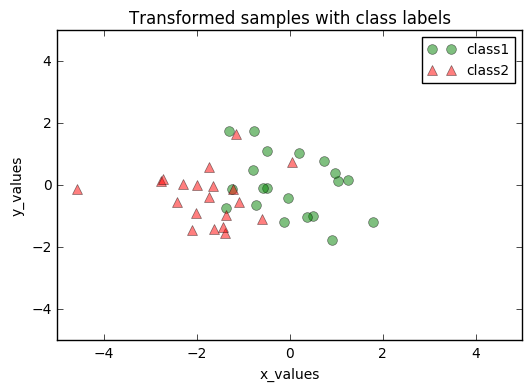

In [58]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [ ]:
#comparison?

#pros
T-SNE gives better visualizations

#on every other mark, efifiecny accuracy, PCA is better

#PCA is label agnostic -- it treats the entire data set as a whole. 
#LDA, on the other hand, tries to explicitly model difference between classes 
#(labels) within the data. 

#PCA performs unsupervised transformation, while LDA is supervised. 


Best visualizations
T-SNE

Best generic dim r method 
PCA 

Best for supervised
LDA


T-SNE
Step 1 - Compute similarity matrix between all feature vectors
Step 2 - Compute similarity matrix from map points
Step 3 - Use gradient descent to minimimze distance between matrices

LDA (Linear Discriminant Analysis)

Similar to LDA except Compute the  M mean vectors for the different classes from the dataset
instead of #Take the whole dataset consisting of dd-dimensional samples ignoring the class labels
Compute the dd-dimensional mean vector (i.e., the means for every dimension of the whole dataset).
